# Exploratory Data Analysis with Fantasy Premier League Data 
(As of Gameweek 29, Season 2019/20)

08/06/2020

This is the very first step of obtaining insights from the vast repository of data from Fantasy Premier League. 
There are two "Parent" tables, namely Teams and Elements. 
Teams contain information aggregated according to each Premier League team. Each row in Teams corresponds to one Premier League team. In it, you will see information such as overall strength, home and away attack and defence ratings, position and points.
Elements contain aggregate information for each Premier League player. Each row in Elements corresponds to one Premier League player. In it, you will see information such as Fantasy Premier League points accrued, goals, assists, and specialised ratings such as threat, creativity and influence. 

There is a significant number of "Child" tables. Each "Child" table basically contains a breakdown of a player's game by game statistics. Each table is named after the player's FPL [ID] and [Web Name]. Each row in the table contains information for the player from a single fixture that has already taken place. 

In this exploratory data analysis, we would like to have a visual brief of how each factor influences the total points accrued by players. Simply put, points accrued by players is the response variable we are most interested in maximising, and we would like to have a preliminary assessment of factors having the strongest relationship.

### Analysis with Aggregate Player Data

In [1]:
# Import required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Obtain elements data from csv file previously downloaded into Pandas dataframe
while os.getcwd().endswith("mailc") == False:
    os.chdir("..")
os.chdir(os.getcwd() + "/R/FPL Player Season History")
elements = pd.read_csv("Elements.csv")
teams = pd.read_csv("Teams.csv")

#### *Spread of total points, organised by position*

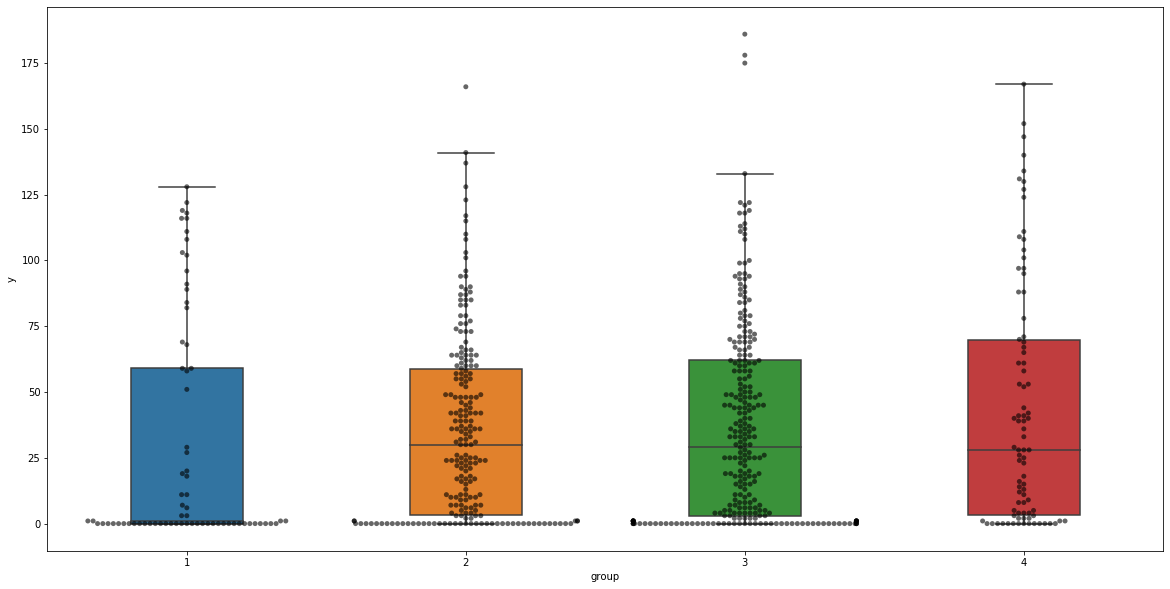

In [40]:
# Plot boxplots of each player positions's points
y = elements['total_points']
group = elements['element_type']
df = pd.DataFrame(dict(y = y, group = group))

plt.figure(figsize = (20, 10))
sns.boxplot(x = "group", y = "y", data = df, width = 0.4, showfliers = False)
sns.swarmplot(x = "group", y = "y", data = df, color = 'black', alpha = 0.6)

The boxplots above gives an indication of the distribution of total points earned by each group of players. Each group of players is defined by their position. Blue - Goalkeepers, Yellow - Defenders, Green - Midfielders, Red - Strikers. 
Other than the Goalkeepers, all other positions have roughly the same median points earned. 

#### *Scatter of total points against Player Cost*

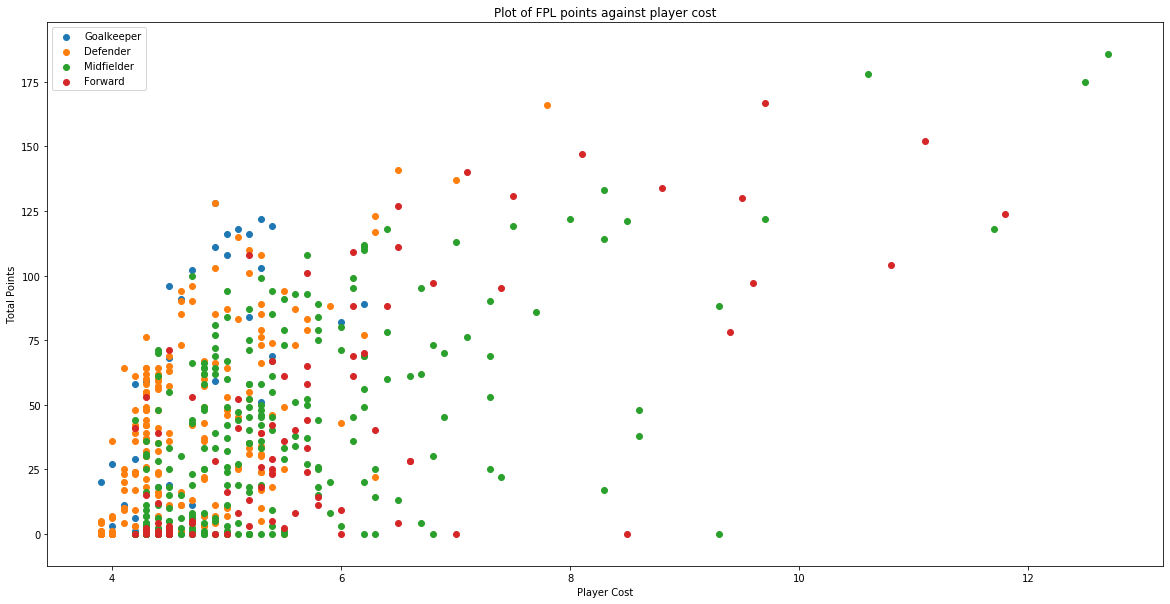

In [14]:
# Plot scatter of FPL points against player cost, grouped by player position
%matplotlib inline
x = elements['now_cost'] / 10
y = elements['total_points']

# 1 - Goalkeeper, 2 - Defender, 3 - Midfielder, 4 - Forward
plot_df = pd.DataFrame(dict(x = x, y = y, group = elements['element_type']))
groups = plot_df.groupby('group')

# Plotting code using subplots
fig, q = plt.subplots()
for elem_type, g in groups:
    q.scatter(g.x, g.y, marker = 'o', label = elem_type)
fig.set_figheight(10)
fig.set_figwidth(20)
q.set_xlabel('Player Cost')
q.set_ylabel('Total Points')
q.set_title('Plot of FPL points against player cost')
q.legend(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'])

# Alternative - without using subplots. However problem comes when setting legend
#plt.scatter(plot_df['x'], plot_df['y'], marker = 'o', c = plot_df['group'], label = set(plot_df['group']))
#plt.xlabel('Player Cost')
#plt.ylabel('Total Points')
#plt.title('Plot of FPL points against player cost')
#plt.legend(loc = "upper left")

First, the most basic relationship we would like to explore is that between player cost and total points. Obviously, to do well in FPL involves some form of maximising the points to cost ratio. From this plot, we can see that there is a general trend of total points increasing as player cost increases. What we would love, are players closest to the top left hand corner. That implies a very high points to cost ratio. In the opposite manner, we will try to avoid players on the bottom right corner, who are expensive and do not give a good return. 

The fact that this scatter plot does not show a strong linear relationship is a good thing for FPL players. It represents an opportunity for shrewd players to pick, as much as possible, players closer to the top left of the plot. 

We can see that there is a cluster of blue points on the top left side. Unfortunately, those are the goalkeepers. Only 1 goalkeeper will be fielded in each gameweek. On the top right side, we can see that some forwards and midfielders are much more costly. However, they bring in more points in general. 

#### *Scatter of total points against player cost, organised by position*

Text(0, 0.5, 'Total Points')

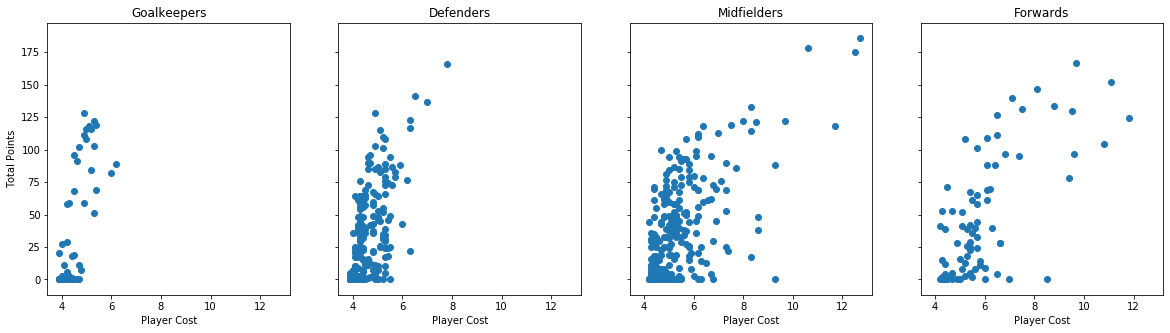

In [88]:
# Plot points against cost in separate axes for each player position type
%matplotlib inline
x = elements['now_cost']/10
y = elements['total_points']
group = elements['element_type']
df = pd.DataFrame(dict(x = x, y = y, group = group))

pos = ['Goalkeepers', 'Defenders', 'Midfielders', 'Forwards']
fig, p = plt.subplots(1, 4, sharex = True, sharey = True)
fig.set_figheight(5)
fig.set_figwidth(20)
for i in range(0,4):
    p[i].scatter(df[df['group'] == (i+1)]['x'], df[df['group'] == (i+1)]['y'])
    p[i].set_title(pos[i])
    p[i].set_xlabel('Player Cost')
p[0].set_ylabel('Total Points')

From the scatter plot of all players against points, I separated the various player types and plotted a scatter of points against cost for each player type. The above set of scatter plots share the same axes, for sake of visual comparison. What is immediately obvious is that the expensive players are all Midfielders and Forwards. No goalkeeper and defender cost more than 8 million. 

In general, the greater prices do bring about a greater return in points. Of course, there are duds which are simply a waste of money. 

#### *Scatter of total points against overall team strength (home), organised by position*

In [4]:
# Append team's overall home strength to each player
strength = []
# for loop must contain both index and row for each iterrow to be of the correct data type
for index, row in elements.iterrows():
    team = row['team_code']
    s = teams[teams['code'] == team]['strength_overall_home'].values[0]
    strength.append(s)
elements['strength_overall_home'] = strength

Text(0, 0.5, 'Total Points')

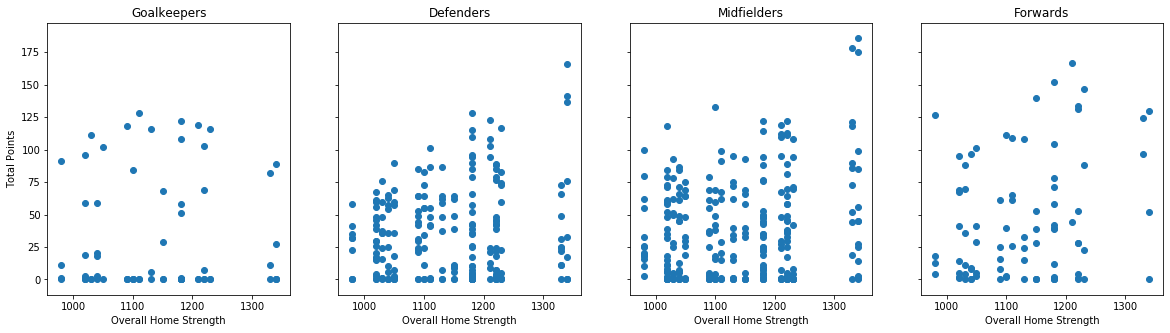

In [5]:
%matplotlib inline
# Plot player points to team's home strength, grouped by position
x = elements['strength_overall_home']
y = elements['total_points']
group = elements['element_type']
df = pd.DataFrame(dict(x = x, y = y, group = group))
groups = df.groupby('group')

# Plotting code using subplots
pos = ['Goalkeepers', 'Defenders', 'Midfielders', 'Forwards']
fig, p = plt.subplots(1, 4, sharex = True, sharey = True)
fig.set_figheight(5)
fig.set_figwidth(20)
for i in range(0,4):
    p[i].scatter(df[df['group'] == (i+1)]['x'], df[df['group'] == (i+1)]['y'])
    p[i].set_title(pos[i])
    p[i].set_xlabel('Overall Home Strength')
p[0].set_ylabel('Total Points')

The set of graphs above explores the relationship between the strength of a player's team and the total points return. For simplicity, I only used overall strength at home as this is just an exploratory step. 

Regardless of position and strength of one's team, there are a huge number of players who are not getting any points. These are the players who are probably not playing for their team at all. 

However, for defenders, we can see that as overall home strength increases, the points return of the top performing defenders for each particular home strength increases. This is probably due to the fact that defenders earn a significant amount of points from clean sheets, which relies on the team's overall strength as opposed to individual brilliance. 

#### *Scatter of total points against minutes played, colour coded by position*

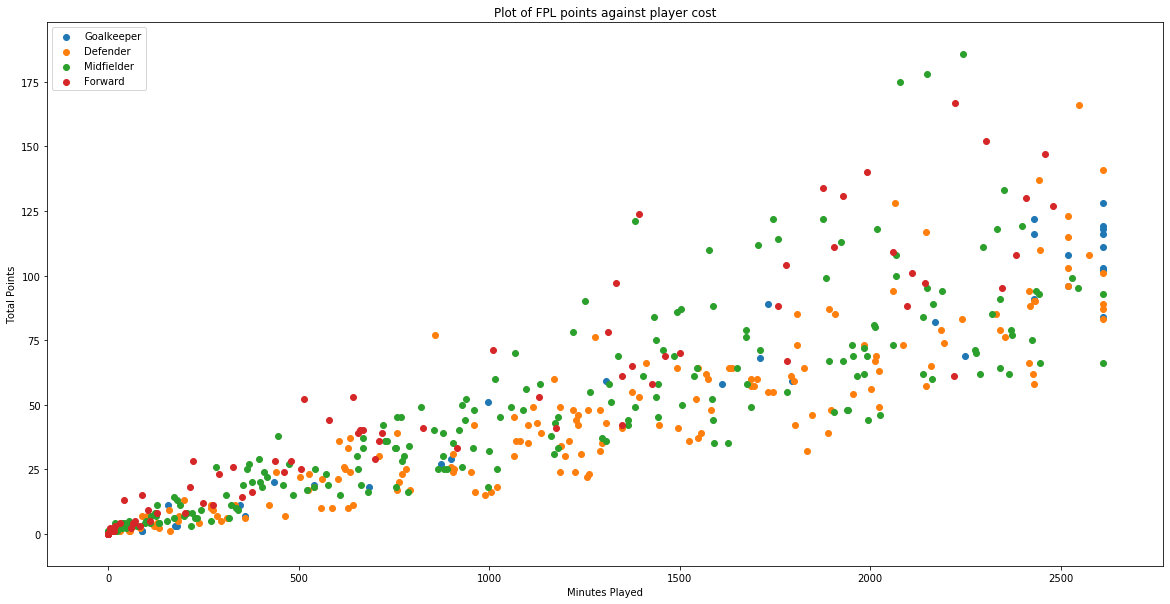

In [6]:
%matplotlib inline
# Plot player points to minutes played without grouping by position
x = elements['minutes']
y = elements['total_points']
group = elements['element_type']
df = pd.DataFrame(dict(x = x, y = y, group = group))
groups = df.groupby('group')

# Plotting code using subplots
fig, q = plt.subplots()
for elem_type, g in groups:
    q.scatter(g.x, g.y, marker = 'o', label = elem_type)
fig.set_figheight(10)
fig.set_figwidth(20)
q.set_xlabel('Minutes Played')
q.set_ylabel('Total Points')
q.set_title('Plot of FPL points against player cost')
q.legend(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'], loc = 2)

The scatter plot above shows the relationship between minutes played and total points accrued. There is a upward trend and also clear divergence in points accrued as minutes played increases. 

It is obvious that playing is the most fundamental criteria for a player to receive any points. Playing more generally leads to getting more points. However, the divergence means that there are other factors which are unaccounted for within this chart. 

One thing to note is that cause and effect in this case should not be clearly established. It could very well be that minutes played by player increases due to the number of points he receives. A player's points comes from significant contributions to the team's efforts, and stronger performances will lead to increased playing time. 

#### *Scatter of total points against ICT index, colour coded by position*

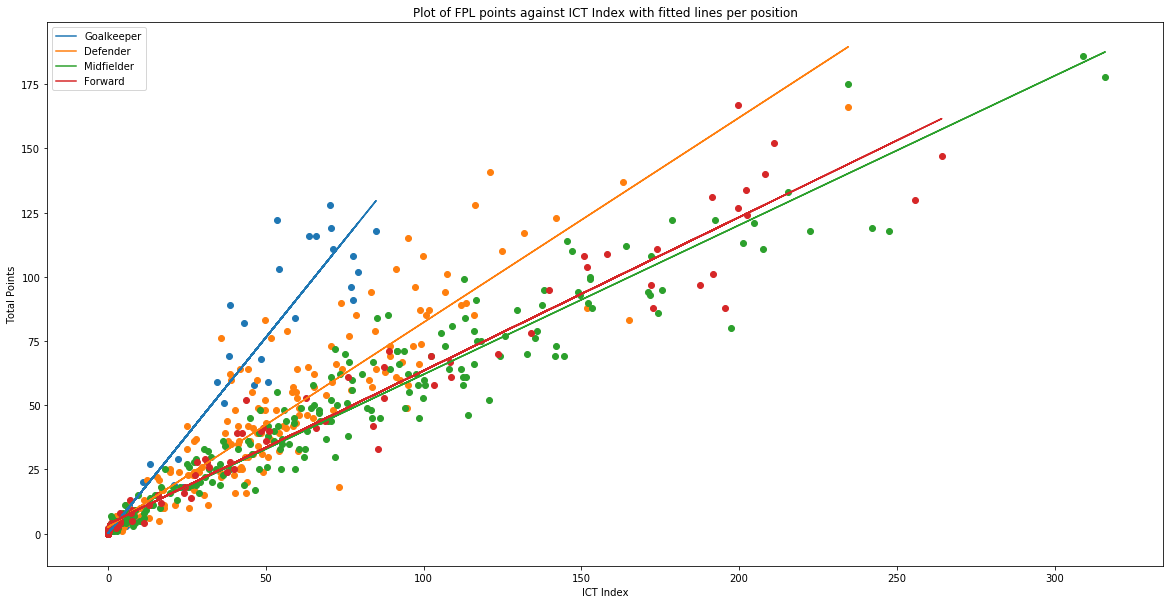

In [10]:
%matplotlib inline
# Plot points against ict index
x = elements['ict_index']
y = elements['total_points']
group = elements['element_type']
df = pd.DataFrame(dict(x = x, y = y, group = group))
groups = df.groupby('group')

# Plotting code using subplots
fig, q = plt.subplots()
for elem_type, g in groups:
    q.scatter(g.x, g.y, marker = 'o', label = elem_type)
    # Best fit line of polynomial 1. m = slope, b = intercept
    m, b = np.polyfit(g.x, g.y, 1)
    q.plot(g.x, m*(g.x)+b)
fig.set_figheight(10)
fig.set_figwidth(20)
q.set_xlabel('ICT Index')
q.set_ylabel('Total Points')
q.set_title('Plot of FPL points against ICT Index with fitted lines per position')
q.legend(['Goalkeeper', 'Defender', 'Midfielder', 'Forward'], loc = 2)

Next, we produce a scatter plot of FPL points against ICT index. There is a strong relationship between ICT index and total points. Another thing to note is that different player position types seem to have an effect on the relationship. We can see from the fitted lines that the Goalkeepers have a steeper slope, followed by Defenders. Midfielders and Forwards have roughly the same line. Either way, this means that ICT index can be a useful predictor for points obtained. It will be important to separately treat each position though. 

#### *Scatter of total points against percentage of FPL players selecting player*

Text(0.5, 1.0, 'Scatter plot of points obtained against percentage of FPL teams selecting player')

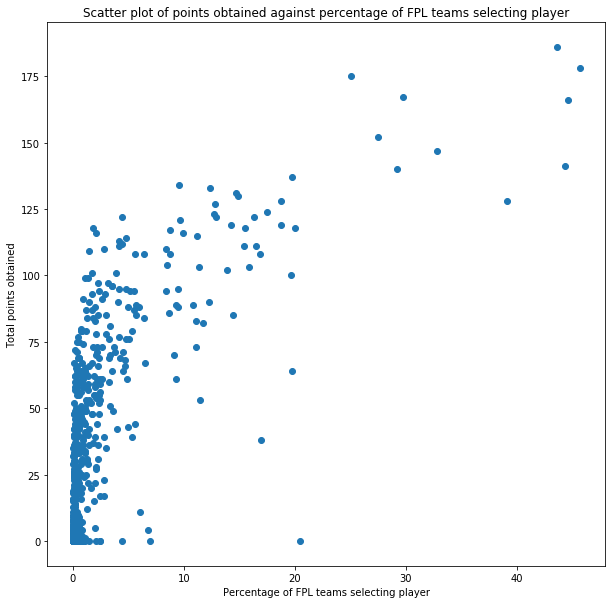

In [7]:
%matplotlib inline
x = elements['selected_by_percent']
y = elements['total_points']
plt.figure(figsize = (10, 10))
plt.scatter(x, y)
plt.xlabel("Percentage of FPL teams selecting player")
plt.ylabel("Total points obtained")
plt.title("Scatter plot of points obtained against percentage of FPL teams selecting player")

This is essentially trying to understand whether there is any benefit to having a herd mentality, by choosing the players preferred by more FPL teams. From the plot above, it does seem to suggest such a trend. It means that players are generally quite discerning when picking players for their FPL team.  

### Analysis with Individual Player Data

In this section, we will look at the game-wise performances of selected players. For the purposes of this analysis, we will divide players by the strength of the clubs they play for, and their positions. There will be 3 tiers:
1. **Top six clubs** (Liverpool, Manchester United, Manchester City, Chelsea, Arsenal, Tottenham)
2. **Mid-table clubs** (Burnley, Crystal Palace, Everton, Leicester, Newcastle, Sheffield United, Southampton, Watford, Wolves)
3. **Relegation threatened clubs** (Aston Villa, Bournemouth, Brighton Hove & Albion, Norwich, West Ham United)

For each analysis, you will see a grid of 4 rows and 3 columns. Each row will contain players of the same position, while each column contains players from the same category of clubs. As a simplifying assumption, we will only select players who have played at least 2000 minutes up to this point in the season. 

In [13]:
# Select pool of players with >= 2000 minutes playing time
pool = elements[elements['minutes'] >= 2000]

# Change working directory to correct local directory
while os.getcwd().endswith("mailc") == False:
    os.chdir("..")
os.chdir(os.getcwd() + "/R/FPL Player Season History")

pool_short = pool[['id', 'web_name', 'minutes', 'team_code', 'element_type']]
#pool_short.to_csv("Players_2000.csv")
# Selected players
# Tier 1: De Gea, van Dijk, de Bruyne, Aubameyang
# Tier 2: Guaita, Lundstram, Neves, Vardy
# Tier 3: Ramsdale, Dunk, Grealish, Pukki
# Read csv files for abovementioned players

t1_gk = pd.read_csv("235_de Gea.csv")
t2_gk = pd.read_csv("131_Guaita.csv")
t3_gk = pd.read_csv("494_Ramsdale.csv")
t1_df = pd.read_csv("183_van Dijk.csv")
t2_df = pd.read_csv("297_Lundstram.csv")
t3_df = pd.read_csv("42_Dunk.csv")
t1_mf = pd.read_csv("215_De Bruyne.csv")
t2_mf = pd.read_csv("414_Neves.csv")
t3_mf = pd.read_csv("29_Grealish.csv")
t1_fw = pd.read_csv("11_Aubameyang.csv")
t2_fw = pd.read_csv("166_Vardy.csv")
t3_fw = pd.read_csv("278_Pukki.csv")

In [45]:
# Creating a list of list of dataframes - players[i][j]. i: position, j: tier
gk = []
gk.extend([t1_gk, t2_gk, t3_gk])
d = []
d.extend([t1_df, t2_df, t3_df])
mf = []
mf.extend([t1_mf, t2_mf, t3_mf])
fw = []
fw.extend([t1_fw, t2_fw, t3_fw])
players = []
players.extend([gk, d, mf, fw])

# Insert opponent's overall strength (home/away) for each fixture for each player
for i in range(0, 4):
    for j in range(0, 3):
        players[i][j] = insert_opponent_strength(players[i][j])

In [42]:
def insert_opponent_strength(df):
    opponent_strength = []
    for index, row in df.iterrows():
        opponent = row['opponent_team']
        if row['was_home'] == True:
            # Opponent is away
            strength = teams[teams['id'] == opponent]['strength_overall_away'].values[0]
        else:
            # Opponent is home
            strength = teams[teams['id'] == opponent]['strength_overall_home'].values[0]
        opponent_strength.append(strength)
    df['opponent_strength'] = opponent_strength
    return df

#### *Scatter plots of players points per game against opponent strength*

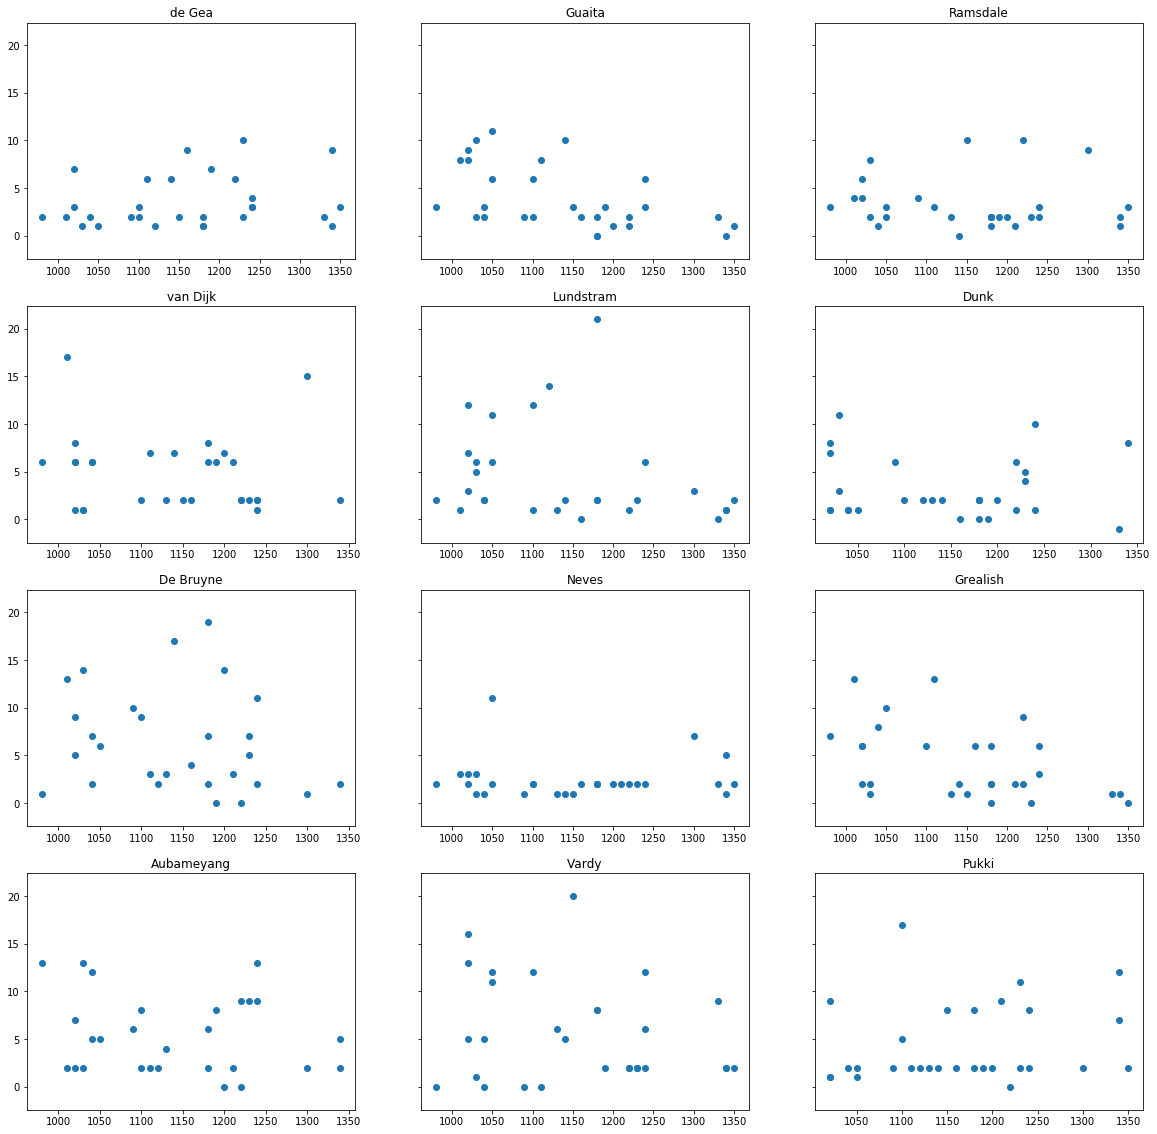

In [51]:
# Create scatter plot of points each game to opponent strength
fig, p = plt.subplots(4, 3, sharey = True)
fig.set_figheight(20)
fig.set_figwidth(20)
for i in range(0, 4):
    for j in range(0, 3):
        p[i][j].scatter(players[i][j]['opponent_strength'], players[i][j]['total_points'])
        pid = players[i][j]['element'].values[0]
        p[i][j].set_title(elements[elements['id'] == pid]['web_name'].values[0])

From the scatter plots above, it appears that the strength of the player's opponent does not have an impact on the points obtained by the player. It happens across players of all tiers and positions. 

#### *Scatter plot of player's points against fixture date*

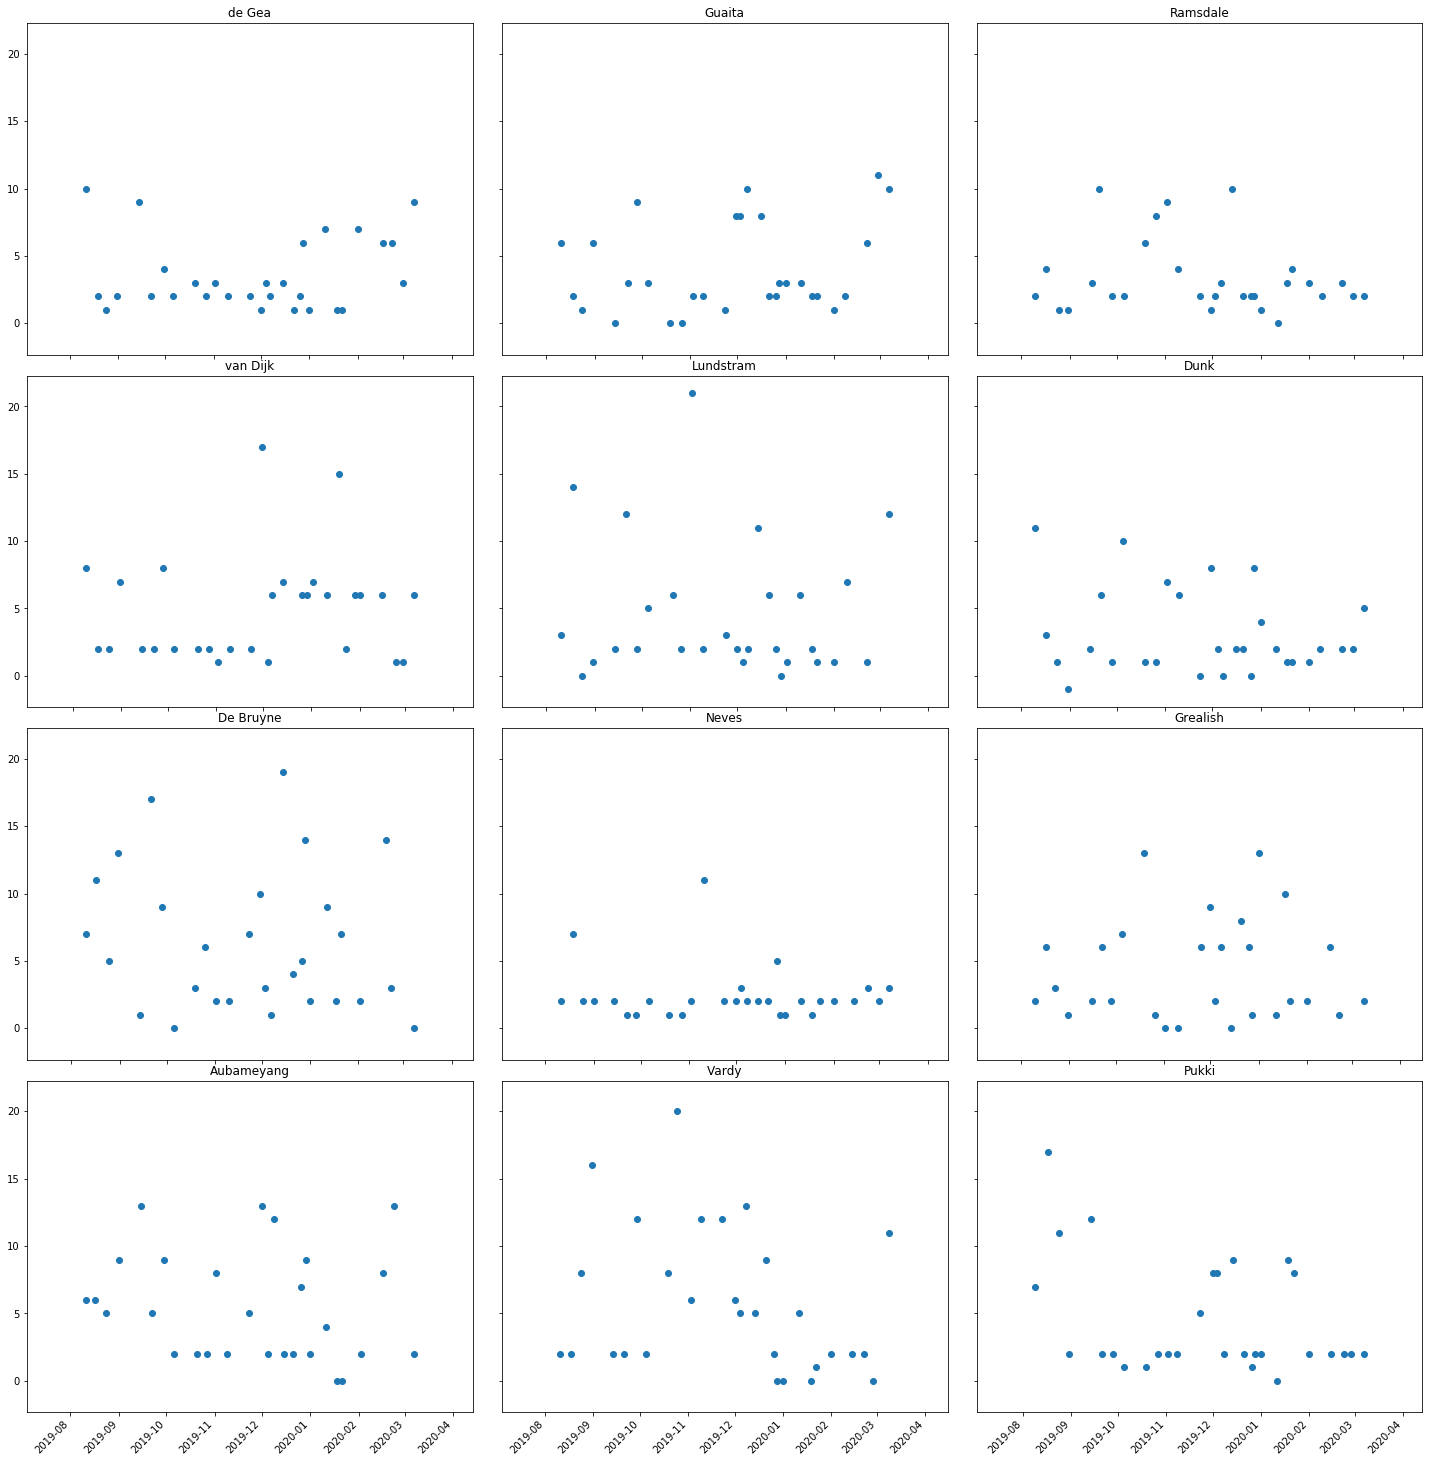

In [73]:
import datetime 
# Create scatter plot of points each game to date of fixture
fig, p = plt.subplots(4, 3, sharey = True)
fig.set_figheight(20)
fig.set_figwidth(20)
fig.autofmt_xdate(rotation=45)
fig.tight_layout()
for i in range(0, 4):
    for j in range(0, 3):
        datelist = []
        for index, row in players[i][j].iterrows():
            dt = datetime.datetime.strptime(row['kickoff_time'], '%Y-%m-%dT%H:%M:%SZ')
            datelist.append(dt.date())
        p[i][j].scatter(datelist, players[i][j]['total_points'])
        pid = players[i][j]['element'].values[0]
        p[i][j].set_title(elements[elements['id'] == pid]['web_name'].values[0])

The purpose of plotting points against date is to isolate the effects of form on players points. If that were to be true, there would be some form of pattern observed in these plots. While we cannot simply say that the effects of recent form do not exist, it is definitely less pronounced compared to what one would expect, given the emphasis on form by broadcasters. 

### Analysis with Combined Individuals' Gameweek Data

In the previous section, we tried to explore, for each player, the effect of their opponent's strength on the total number of points obtained. While the results were inconclusive, it should also be noted that 29 data points is too small a sample size. The first section worked with aggregated players' data, and it showed some relationships. 

This section, we will combine some features of the first and second sections. We will combine individuals' gameweek data without aggregating them into total points earned. 

In [10]:
# Create list of file names for retrieving csv data
filelist = []
for index, row in elements.iterrows():
    filename = str(row['id']) + '_' + row['web_name'] + '.csv'
    filelist.append(filename)

# Ensure correct directory for reading in data
while os.getcwd().endswith("mailc") == False:
    os.chdir("..")
os.chdir(os.getcwd() + "/R/FPL Player Season History")

# Combine all individual gameweek data across different players after reading in csv
colnames = pd.read_csv(filelist[0]).columns
elements_gw = pd.DataFrame(columns = colnames)
for filename in filelist:
    elements_gw = elements_gw.append(pd.read_csv(filename), ignore_index = True)

#### *Boxplots of players' points home vs away*

In [11]:
# Choose only rows where that player has played at least 1 minute for that particular gameweek
e_gw_played = elements_gw[elements_gw['minutes'] > 0]

# Insert element type into dataframe as new column
player_type = []
for index, row in e_gw_played.iterrows():
    pid = row['element']
    prow = elements[elements['id'] == pid].copy()
    ptype = prow['element_type'].values[0]
    player_type.append(ptype)

if 'element_type' in e_gw_played:
    e_gw_played.drop(columns = 'element_type')
e_gw_played.insert(loc = 0, column = 'element_type', value = player_type)

Text(0.5, 1.0, 'Boxplot of points scored each game Away (Left) vs Home (Right)')

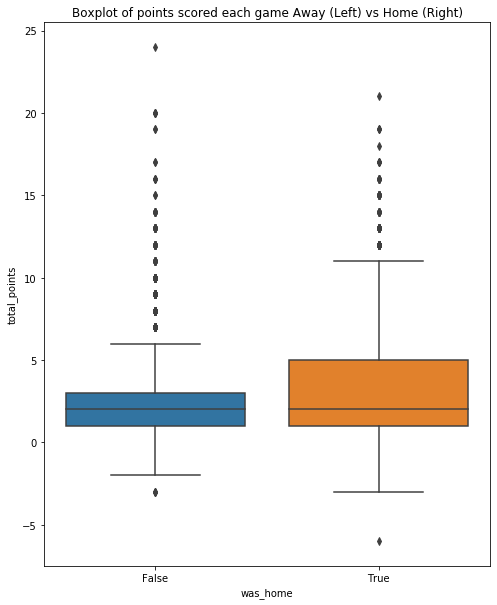

In [55]:
# Plot boxplot between home and away performances as a whole
plt.figure(figsize = (8, 10))
bp = sns.boxplot(y='total_points', x='was_home', data=e_gw_played)
plt.title('Boxplot of points scored each game Away (Left) vs Home (Right)')

We can see that the median number of points scored seems to be similar for both home and away performances. However, there seems to be a greater spread in the number of points scored at home. We shall plot the same boxplots below, but with a boxplot for each player position this time. 

Text(0.5, 1.0, 'Boxplot of points scored each game Away (Left) vs Home (Right) for different player positions')

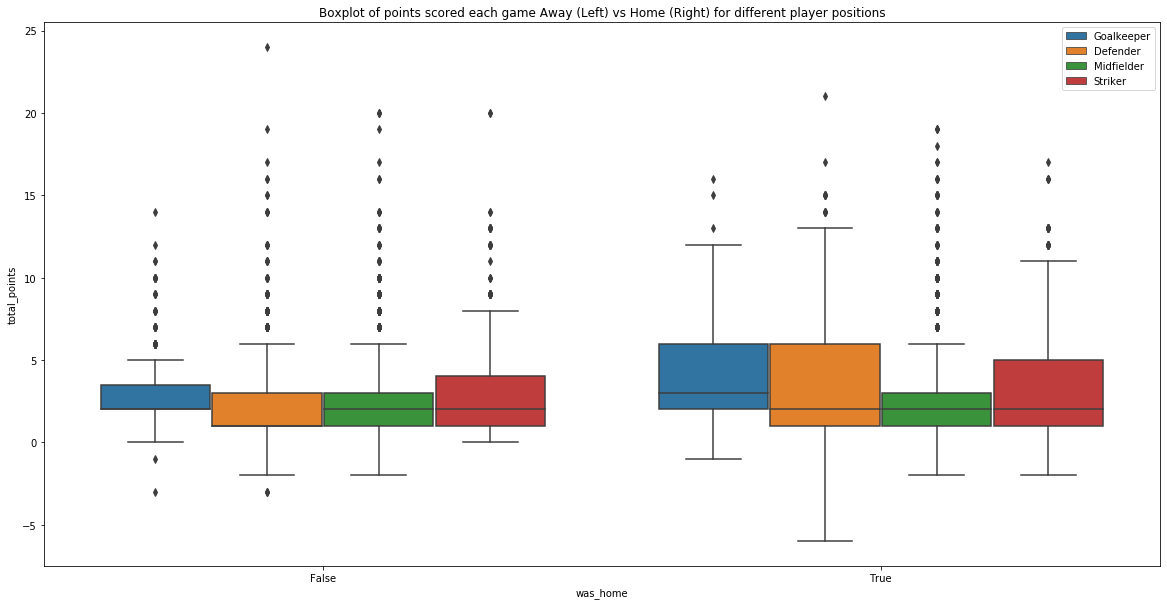

In [12]:
# Plot boxplot between home and away performances, for each player position type
plt.figure(figsize = (20, 10))
bp = sns.boxplot(y='total_points', x='was_home', data=e_gw_played, hue = 'element_type')
# Handles are required to correlate colour to position
handles, labels = bp.get_legend_handles_labels()
bp.legend(handles, ['Goalkeeper', 'Defender', 'Midfielder', 'Striker'])
plt.title('Boxplot of points scored each game Away (Left) vs Home (Right) for different player positions')

We can see from the plot that there seems to be some difference in terms of how players' points are distributed when playing at home vs playing away. At home, there is greater variability in the points scored for goalkeepers, defenders and striker. The boxplot is not the best in visualising this, so we will move to plotting a histogram instead.

#### *Histogram of Players' Performances Home and Away*

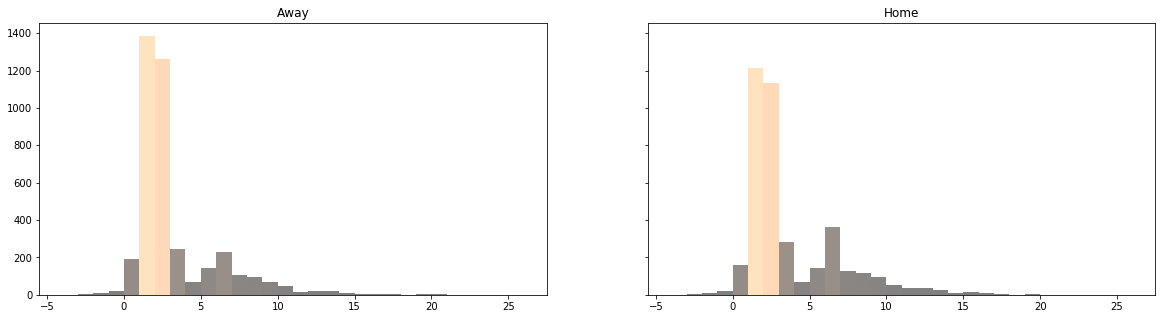

matplotlib.cbook.silent_list

In [92]:
e_home = e_gw_played[e_gw_played['was_home'] == True]
e_away = e_gw_played[e_gw_played['was_home'] == False]

fig, axes = plt.subplots(ncols=2, sharey = True)
fig.set_figheight(5)
fig.set_figwidth(20)

axes[0].set_title('Away')
n, bins, patches = axes[0].hist(e_away['total_points'], bins = 30, facecolor='c', alpha=0.5, range = (-4, 26))
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.copper(n[i]/max(n)))

axes[1].set_title('Home')
n2, bins2, patches2 = axes[1].hist(e_home['total_points'], bins = 30, alpha=0.5, range = (-4, 26))
for i in range(len(patches2)):
    patches2[i].set_facecolor(plt.cm.copper(n[i]/max(n)))

plt.show()

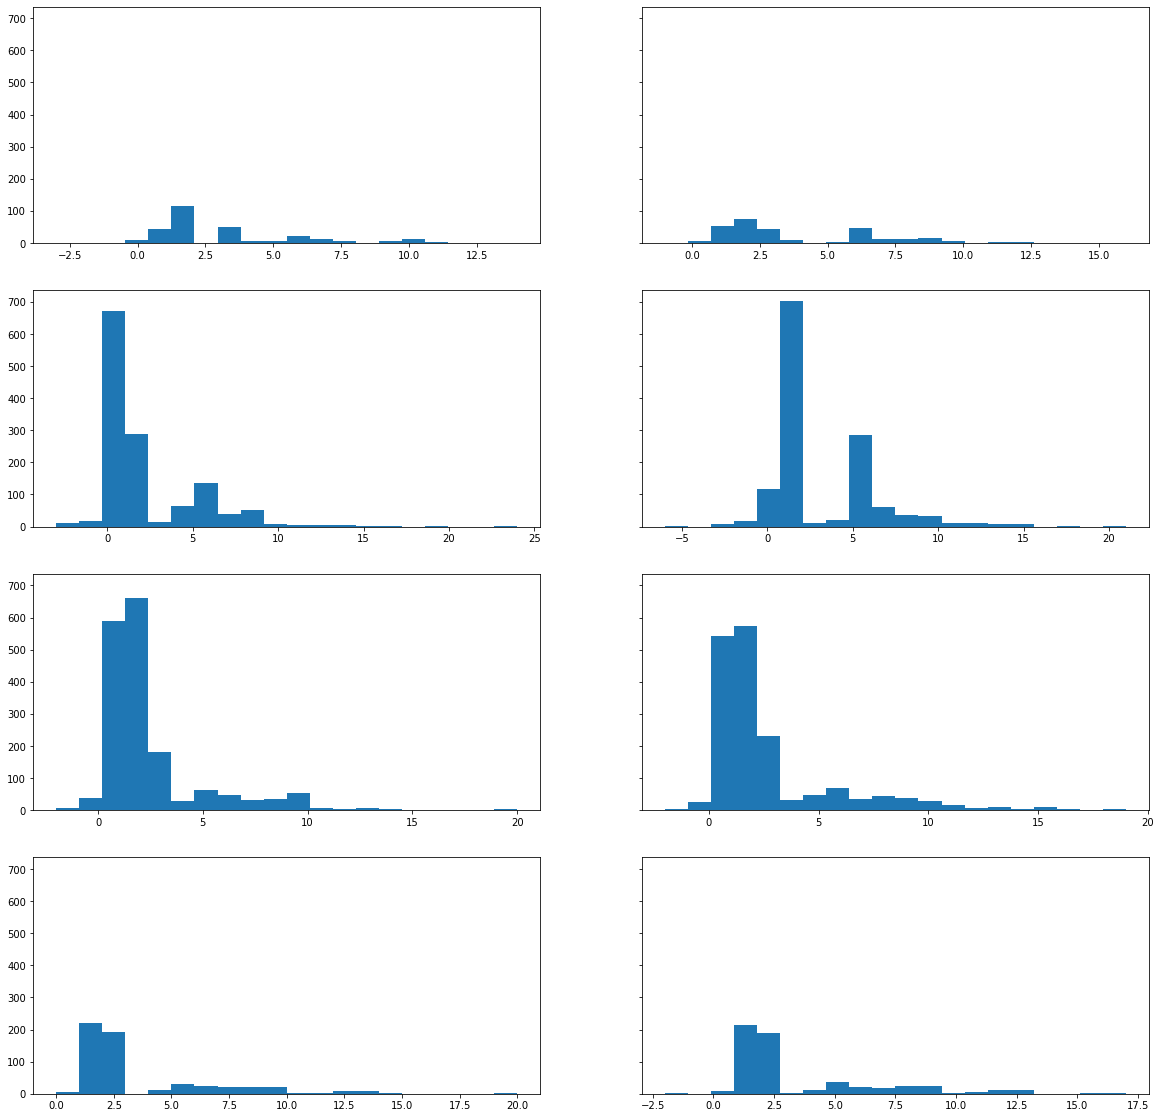

In [101]:
nr = 4
nc = 2
fig, axes = plt.subplots(nrows = nr, ncols = nc, sharey = True)
fig.set_figheight(20)
fig.set_figwidth(20)

for i in range(0, nr):
    for j in range(0, nc):
        nbins = 20
        rng = range(-5, 25)
        if j == 0:
            axes[i, j].hist(e_away[e_away['element_type'] == (i+1)]['total_points'], bins = nbins)
        else:
            axes[i, j].hist(e_home[e_home['element_type'] == (i+1)]['total_points'], bins = nbins)